# Uber Supply-Demand Gap

In [1]:
# importing essential python modules
import numpy as np
import pandas as pd
import datetime
import calendar
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv("./Uber Request Data.csv")
df.head()

,Request id,Pickup point,Driver id,Status,Request timestamp,Drop timestamp
0,619,Airport,1.0,Trip Completed,11/7/2016 11:51,11/7/2016 13:00
1,867,Airport,1.0,Trip Completed,11/7/2016 17:57,11/7/2016 18:47
2,1807,City,1.0,Trip Completed,12/7/2016 9:17,12/7/2016 9:58
3,2532,Airport,1.0,Trip Completed,12/7/2016 21:08,12/7/2016 22:03
4,3112,City,1.0,Trip Completed,13-07-2016 08:33:16,13-07-2016 09:25:47


In [3]:
# total number of rows
print(len(df.index))

6745


In [4]:
# fixing the column names to convert them into lowercase and use underscores instead of spaces.
df.columns = df.columns.str.strip().str.lower().str.replace(' ', '_')

In [5]:
# checking the number of duplicate rows on the basis of request id
len(df[df.duplicated(subset='request_id')].index)

0

### There are not duplicate rows

In [6]:
# checking if the  value for request id, pickup point or request timestamp is NA for any rows
df[df.request_id.isna() | df.pickup_point.isna() | df.status.isna() | df.request_timestamp.isna()]

,request_id,pickup_point,driver_id,status,request_timestamp,drop_timestamp


### There are no rows with missing values for Request id, Pickup point, Status or Request timestamp

In [7]:
# Making the time separator consistent
df.request_timestamp = df.request_timestamp.str.replace("/","-")
df.drop_timestamp = df.drop_timestamp.str.replace("/","-")
df.head()

,request_id,pickup_point,driver_id,status,request_timestamp,drop_timestamp
0,619,Airport,1.0,Trip Completed,11-7-2016 11:51,11-7-2016 13:00
1,867,Airport,1.0,Trip Completed,11-7-2016 17:57,11-7-2016 18:47
2,1807,City,1.0,Trip Completed,12-7-2016 9:17,12-7-2016 9:58
3,2532,Airport,1.0,Trip Completed,12-7-2016 21:08,12-7-2016 22:03
4,3112,City,1.0,Trip Completed,13-07-2016 08:33:16,13-07-2016 09:25:47


In [8]:
# Converting the timestamp columns to datatime data type so that they can be used for analysis
df['request_timestamp'] = pd.to_datetime(df['request_timestamp'],dayfirst=True)
df['drop_timestamp'] = pd.to_datetime(df['drop_timestamp'],dayfirst=True)
df.head()

,request_id,pickup_point,driver_id,status,request_timestamp,drop_timestamp
0,619,Airport,1.0,Trip Completed,2016-07-11 11:51:00,2016-07-11 13:00:00
1,867,Airport,1.0,Trip Completed,2016-07-11 17:57:00,2016-07-11 18:47:00
2,1807,City,1.0,Trip Completed,2016-07-12 09:17:00,2016-07-12 09:58:00
3,2532,Airport,1.0,Trip Completed,2016-07-12 21:08:00,2016-07-12 22:03:00
4,3112,City,1.0,Trip Completed,2016-07-13 08:33:16,2016-07-13 09:25:47


In [9]:
# Extracting request_date, request_day_of_the_week and request_hour columns from the request_timestamp column
df['request_date'] = df.request_timestamp.dt.day
df['request_day_of_the_week'] = df.request_timestamp.apply(lambda x : calendar.day_name[x.weekday()])
df['request_hour'] = df.request_timestamp.dt.hour
df.head()

,request_id,pickup_point,driver_id,status,request_timestamp,drop_timestamp,request_date,request_day_of_the_week,request_hour
0,619,Airport,1.0,Trip Completed,2016-07-11 11:51:00,2016-07-11 13:00:00,11,Monday,11
1,867,Airport,1.0,Trip Completed,2016-07-11 17:57:00,2016-07-11 18:47:00,11,Monday,17
2,1807,City,1.0,Trip Completed,2016-07-12 09:17:00,2016-07-12 09:58:00,12,Tuesday,9
3,2532,Airport,1.0,Trip Completed,2016-07-12 21:08:00,2016-07-12 22:03:00,12,Tuesday,21
4,3112,City,1.0,Trip Completed,2016-07-13 08:33:16,2016-07-13 09:25:47,13,Wednesday,8


## Results Expected - Part 1

## Analysis by status

### Creating 5 different dataframes for 5 days under observation and then grouping the data to create plots

Text(0, 0.5, 'No of Requests')

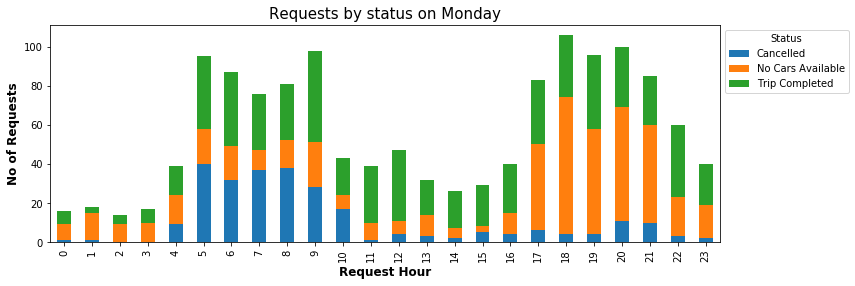

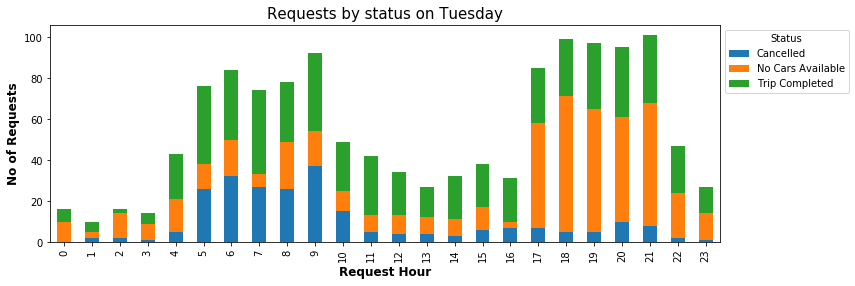

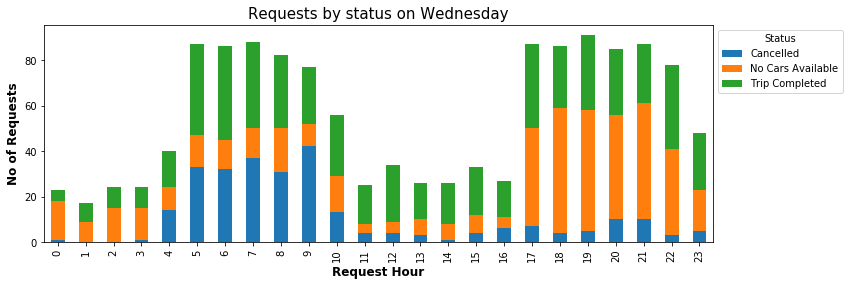

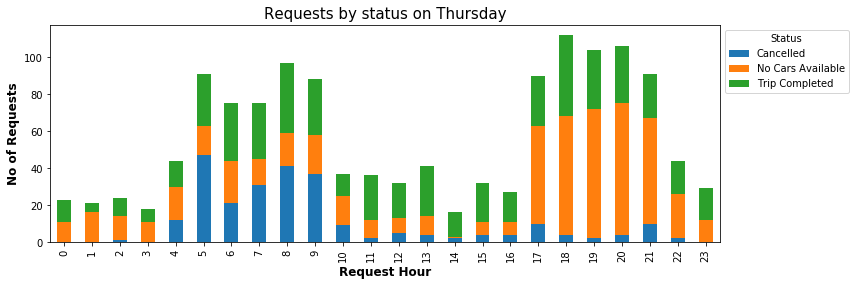

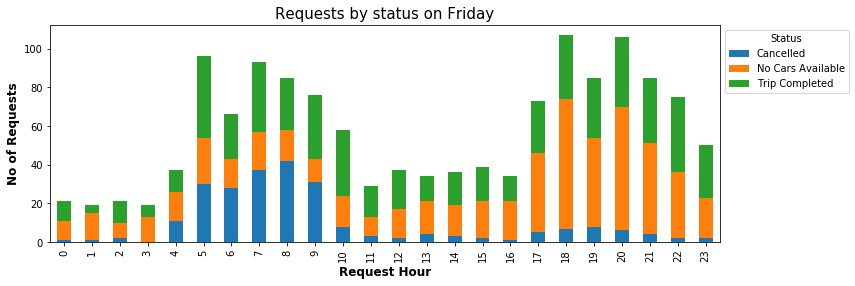

In [10]:
# Creating a day-wise grouping for request_hour and status so that a plot can be created for number of requests
# Day of the week Monday
df_group_by_hour_status_mon = df[df.request_day_of_the_week == "Monday"].groupby(['request_hour','status'])['request_id'].count().unstack()
# Day of the week Tuesday
df_group_by_hour_status_tue = df[df.request_day_of_the_week == "Tuesday"].groupby(['request_hour','status'])['request_id'].count().unstack()
# Day of the week Wednesday
df_group_by_hour_status_wed = df[df.request_day_of_the_week == "Wednesday"].groupby(['request_hour','status'])['request_id'].count().unstack()
# Day of the week Thursday
df_group_by_hour_status_thu = df[df.request_day_of_the_week == "Thursday"].groupby(['request_hour','status'])['request_id'].count().unstack()
# Day of the week Friday
df_group_by_hour_status_fri = df[df.request_day_of_the_week == "Friday"].groupby(['request_hour','status'])['request_id'].count().unstack()

mon_plot = df_group_by_hour_status_mon.plot(kind='bar',stacked=True,title="Requests by status on Monday",figsize=(12,4))
mon_plot.legend(title="Status", bbox_to_anchor=(1, 1))
mon_plot.title.set_size(15)
mon_plot.set_xlabel("Request Hour",fontsize=12,fontweight='bold')
mon_plot.set_ylabel("No of Requests",fontsize=12,fontweight='bold')

tue_plot = df_group_by_hour_status_tue.plot(kind='bar',stacked=True,title="Requests by status on Tuesday",figsize=(12,4))
tue_plot.legend(title="Status", bbox_to_anchor=(1, 1))
tue_plot.title.set_size(15)
tue_plot.set_xlabel("Request Hour",fontsize=12,fontweight='bold')
tue_plot.set_ylabel("No of Requests",fontsize=12,fontweight='bold')

wed_plot = df_group_by_hour_status_wed.plot(kind='bar',stacked=True,title="Requests by status on Wednesday",figsize=(12,4))
wed_plot.legend(title="Status", bbox_to_anchor=(1, 1))
wed_plot.title.set_size(15)
wed_plot.set_xlabel("Request Hour",fontsize=12,fontweight='bold')
wed_plot.set_ylabel("No of Requests",fontsize=12,fontweight='bold')

thu_plot = df_group_by_hour_status_thu.plot(kind='bar',stacked=True,title="Requests by status on Thursday",figsize=(12,4))
thu_plot.legend(title="Status", bbox_to_anchor=(1, 1))
thu_plot.title.set_size(15)
thu_plot.set_xlabel("Request Hour",fontsize=12,fontweight='bold')
thu_plot.set_ylabel("No of Requests",fontsize=12,fontweight='bold')

fri_plot = df_group_by_hour_status_fri.plot(kind='bar',stacked=True,title="Requests by status on Friday",figsize=(12,4))
fri_plot.legend(title="Status", bbox_to_anchor=(1, 1))
fri_plot.title.set_size(15)
fri_plot.set_xlabel("Request Hour",fontsize=12,fontweight='bold')
fri_plot.set_ylabel("No of Requests",fontsize=12,fontweight='bold')

### It can be seen from the above plots that the most number of requests get cancelled during the morning hours (5 AM - 10 AM) and the most number of requests aren't fulfilled due to "No cars available" during evening hours (5 PM - 10 PM)

Text(0, 0.5, 'No of Requests')

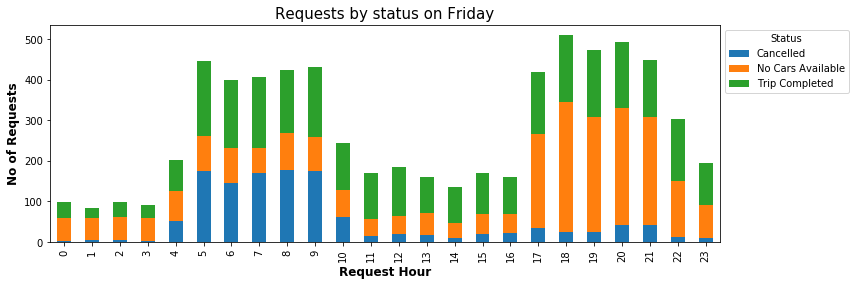

In [11]:
# Plotting a similar graph for the complete data-set
df_group_by_hour_status = df.groupby(['request_hour','status'])['request_id'].count().unstack()
total_plot =df_group_by_hour_status.plot(kind='bar',stacked=True,title="Requests by status on Friday",figsize=(12,4))
total_plot.legend(title="Status", bbox_to_anchor=(1, 1))
total_plot.title.set_size(15)
total_plot.set_xlabel("Request Hour",fontsize=12,fontweight='bold')
total_plot.set_ylabel("No of Requests",fontsize=12,fontweight='bold')

### It can be seen that the overall trend is consistent with the day-wise trend with respect to the frequency of requests that get cancelled or show 'no cars available'.

## Analysis by Pick-up point

### Creating day-wise plots for rides grouped by the request_hour and pickup_point

Text(0, 0.5, 'No of Requests')

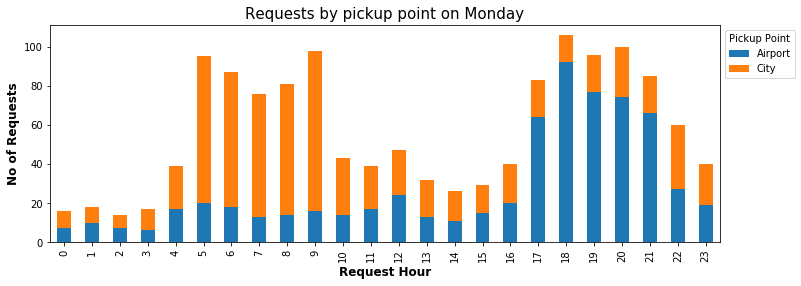

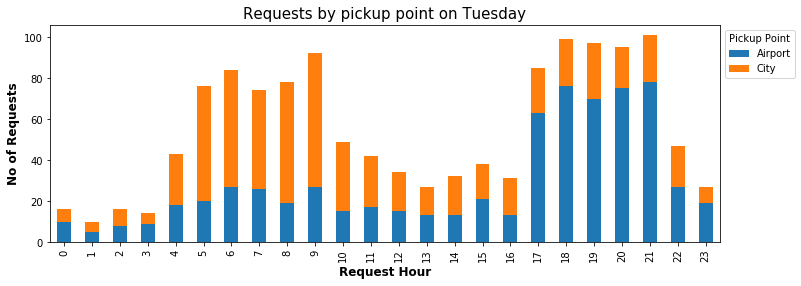

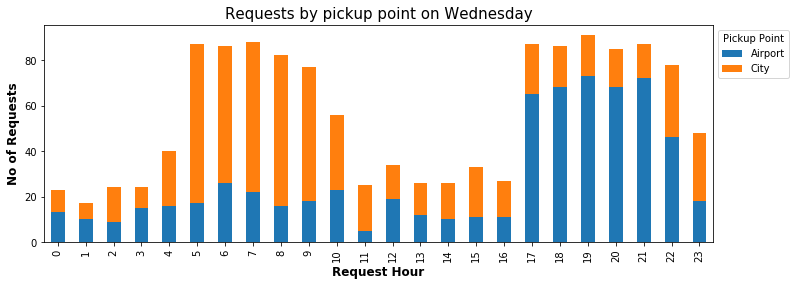

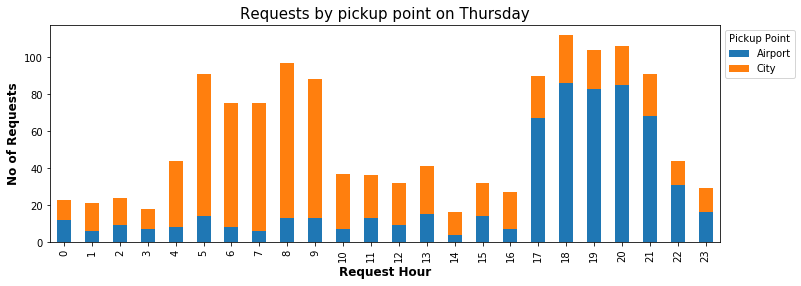

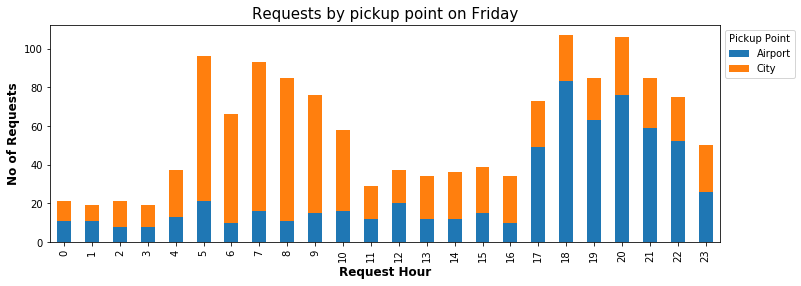

In [12]:
# Creating a day-wise grouping for  request_hour and pickup_point so that a plot can be created for number of requests
# Day of the week Monday
df_pickup_point_group_mon = df[df.request_day_of_the_week == "Monday"].groupby(['request_hour','pickup_point'])['request_id'].count().unstack()

# Day of the week Tuesday
df_pickup_point_group_tue = df[df.request_day_of_the_week == "Tuesday"].groupby(['request_hour','pickup_point'])['request_id'].count().unstack()

# Day of the week Wednesday
df_pickup_point_group_wed = df[df.request_day_of_the_week == "Wednesday"].groupby(['request_hour','pickup_point'])['request_id'].count().unstack()

# Day of the week Thursday
df_pickup_point_group_thu = df[df.request_day_of_the_week == "Thursday"].groupby(['request_hour','pickup_point'])['request_id'].count().unstack()

# Day of the week Friday
df_pickup_point_group_fri = df[df.request_day_of_the_week == "Friday"].groupby(['request_hour','pickup_point'])['request_id'].count().unstack()

pickup_mon_plot = df_pickup_point_group_mon.plot(kind='bar',stacked=True,title="Requests by pickup point on Monday",figsize=(12,4))
pickup_mon_plot.legend(title="Pickup Point", bbox_to_anchor=(1, 1))
pickup_mon_plot.title.set_size(15)
pickup_mon_plot.set_xlabel("Request Hour",fontsize=12,fontweight='bold')
pickup_mon_plot.set_ylabel("No of Requests",fontsize=12,fontweight='bold')

pickup_tue_plot = df_pickup_point_group_tue.plot(kind='bar',stacked=True,title="Requests by pickup point on Tuesday",figsize=(12,4))
pickup_tue_plot.legend(title="Pickup Point", bbox_to_anchor=(1, 1))
pickup_tue_plot.title.set_size(15)
pickup_tue_plot.set_xlabel("Request Hour",fontsize=12,fontweight='bold')
pickup_tue_plot.set_ylabel("No of Requests",fontsize=12,fontweight='bold')

pickup_wed_plot = df_pickup_point_group_wed.plot(kind='bar',stacked=True,title="Requests by pickup point on Wednesday",figsize=(12,4))
pickup_wed_plot.legend(title="Pickup Point", bbox_to_anchor=(1, 1))
pickup_wed_plot.title.set_size(15)
pickup_wed_plot.set_xlabel("Request Hour",fontsize=12,fontweight='bold')
pickup_wed_plot.set_ylabel("No of Requests",fontsize=12,fontweight='bold')

pickup_thu_plot = df_pickup_point_group_thu.plot(kind='bar',stacked=True,title="Requests by pickup point on Thursday",figsize=(12,4))
pickup_thu_plot.legend(title="Pickup Point", bbox_to_anchor=(1, 1))
pickup_thu_plot.title.set_size(15)
pickup_thu_plot.set_xlabel("Request Hour",fontsize=12,fontweight='bold')
pickup_thu_plot.set_ylabel("No of Requests",fontsize=12,fontweight='bold')

pickup_fri_plot = df_pickup_point_group_fri.plot(kind='bar',stacked=True,title="Requests by pickup point on Friday",figsize=(12,4))
pickup_fri_plot.legend(title="Pickup Point", bbox_to_anchor=(1, 1))
pickup_fri_plot.title.set_size(15)
pickup_fri_plot.set_xlabel("Request Hour",fontsize=12,fontweight='bold')
pickup_fri_plot.set_ylabel("No of Requests",fontsize=12,fontweight='bold')

### It can be seen from the above plots that the trend pattern is same for all the 5 days. During morning hours (5 AM - 10 AM) requests originate more from the city than from the airport. During evening hours (5 PM - 10 PM) requests originate more from the airport than from the city.

Text(0,0.5,'No of Requests')

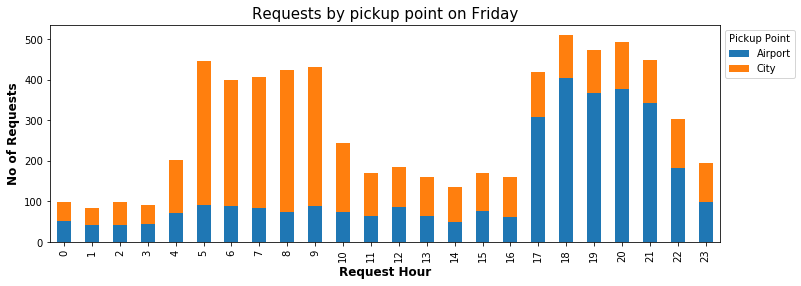

In [13]:
# Plotting similar graph for the complete data set
df_pickup_point_group = df.groupby(['request_hour','pickup_point'])['request_id'].count().unstack()

pickup_plot = df_pickup_point_group.plot(kind='bar',stacked=True,title="Requests by pickup point on Friday",figsize=(12,4))
pickup_plot.legend(title="Pickup Point", bbox_to_anchor=(1, 1))
pickup_plot.title.set_size(15)
pickup_plot.set_xlabel("Request Hour",fontsize=12,fontweight='bold')
pickup_plot.set_ylabel("No of Requests",fontsize=12,fontweight='bold')

### It can be seen from the above graph that the overall trend is consistent with the day-wise trend for the analysis based on the pick up point.

## Analysis by pickup point and status both

### Plotting graph for the requests for each pickup point grouped by status to identify problematic requests

Text(0,0.5,'No of Requests')

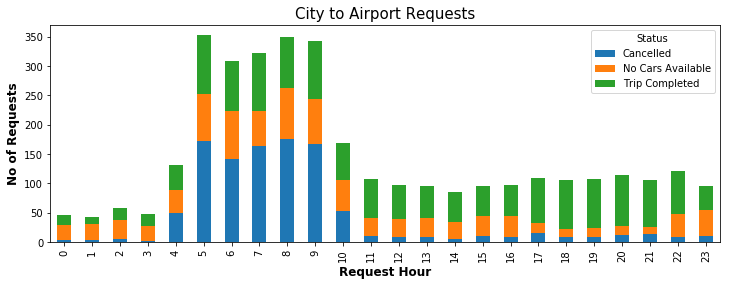

In [14]:
# Plotting for city to airport requests
df_city_status_group = df[df.pickup_point=="City"].groupby(['request_hour','status'])['request_id'].count().unstack()

city_status_plot = df_city_status_group.plot(kind='bar',stacked=True,title="City to Airport Requests",figsize=(12,4))
city_status_plot.legend(title="Status", bbox_to_anchor=(1, 1))
city_status_plot.title.set_size(15)
city_status_plot.set_xlabel("Request Hour",fontsize=12,fontweight='bold')
city_status_plot.set_ylabel("No of Requests",fontsize=12,fontweight='bold')

### The above plot shows that during morning hours (5 AM - 10 AM), a lot of requests originating from City get cancelled.

Text(0,0.5,'No of Requests')

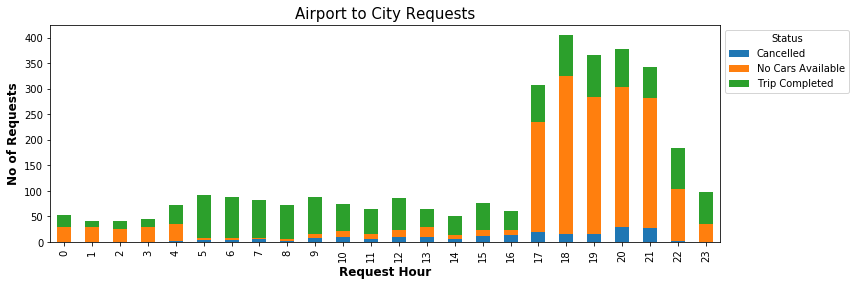

In [15]:
# Plotting for airport to city requests
df_city_status_group = df[df.pickup_point=="Airport"].groupby(['request_hour','status'])['request_id'].count().unstack()

city_status_plot = df_city_status_group.plot(kind='bar',stacked=True,title="Airport to City Requests",figsize=(12,4))
city_status_plot.legend(title="Status", bbox_to_anchor=(1, 1))
city_status_plot.title.set_size(15)
city_status_plot.set_xlabel("Request Hour",fontsize=12,fontweight='bold')
city_status_plot.set_ylabel("No of Requests",fontsize=12,fontweight='bold')

### The above plot shows that during evening hours (5PM - 10PM), a lot of requests originating from Airport aren't fulfilled due to "No Cars Available"

### The two above plots lead to a conclusion that two pressing problems are "Cancellations" for "City to Airport" rides during Morning hours and "No Cars Available" for "Airport to City" rides during evening hours.

## Analysis by time-slots

In [16]:
# Binning hours to create time slots as per following considerations
""" 12 AM -  5 AM :- Pre-Morning
     5 AM - 10 AM :- Morning-Rush
    10 AM -  5 PM :- Day-Time
     5 PM - 10 PM :- Evening-Rush
    10 PM - 12 AM :- Late-Night """

df['time_slot'] = df.request_hour.apply(lambda x : "Pre-Morning" if 0 <= x < 5 else "Morning-Rush" if 5 <= x < 10 else "Day-Time" if 10 <= x < 17 else "Evening-Rush" if 17 <= x < 22 else "Late-Night")
df

,request_id,pickup_point,driver_id,status,request_timestamp,drop_timestamp,request_date,request_day_of_the_week,request_hour,time_slot
0,619,Airport,1.0,Trip Completed,2016-07-11 11:51:00,2016-07-11 13:00:00,11,Monday,11,Day-Time
1,867,Airport,1.0,Trip Completed,2016-07-11 17:57:00,2016-07-11 18:47:00,11,Monday,17,Evening-Rush
2,1807,City,1.0,Trip Completed,2016-07-12 09:17:00,2016-07-12 09:58:00,12,Tuesday,9,Morning-Rush
3,2532,Airport,1.0,Trip Completed,2016-07-12 21:08:00,2016-07-12 22:03:00,12,Tuesday,21,Evening-Rush
4,3112,City,1.0,Trip Completed,2016-07-13 08:33:16,2016-07-13 09:25:47,13,Wednesday,8,Morning-Rush
5,3879,Airport,1.0,Trip Completed,2016-07-13 21:57:28,2016-07-13 22:28:59,13,Wednesday,21,Evening-Rush
6,4270,Airport,1.0,Trip Completed,2016-07-14 06:15:32,2016-07-14 07:13:15,14,Thursday,6,Morning-Rush
7,5510,Airport,1.0,Trip Completed,2016-07-15 05:11:52,2016-07-15 06:07:52,15,Friday,5,Morning-Rush
8,6248,City,1.0,Trip Completed,2016-07-15 17:57:27,2016-07-15 18:50:51,15,Friday,17,Evening-Rush
9,267,City,2.0,Trip Completed,2016-07-11 06:46:00,2016-07-11 07:25:00,11,Monday,6,Morning-Rush


Text(0,0.5,'No of Requests')

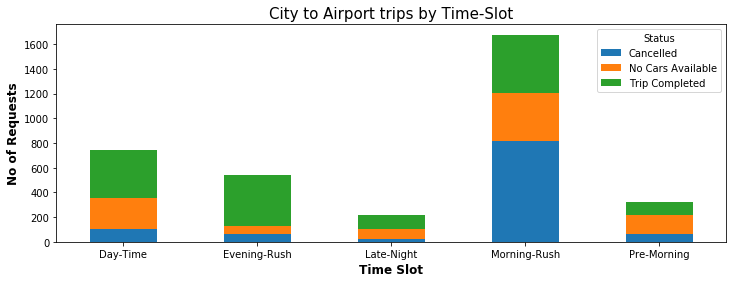

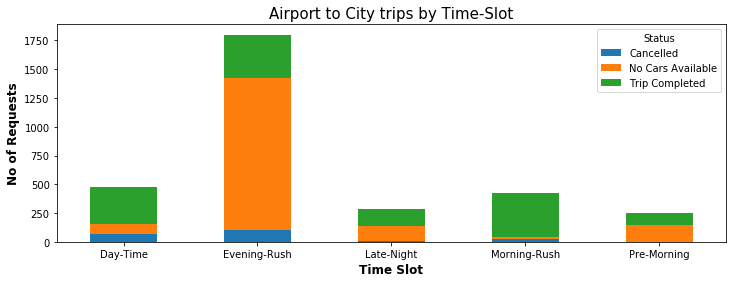

In [17]:
# Grouping by time-slot

df_time_slot_city_group = df[df.pickup_point=="City"].groupby(['time_slot','status'])['request_id'].count().unstack()

time_slot_city_plot = df_time_slot_city_group.plot(kind='bar',stacked=True,title="City to Airport trips by Time-Slot",figsize=(12,4),rot=0)
time_slot_city_plot.title.set_size(15)
time_slot_city_plot.legend(title="Status", bbox_to_anchor=(1, 1))
time_slot_city_plot.set_xlabel("Time Slot",fontsize=12,fontweight='bold')
time_slot_city_plot.set_ylabel("No of Requests",fontsize=12,fontweight='bold')

df_time_slot_airport_group = df[df.pickup_point=="Airport"].groupby(['time_slot','status'])['request_id'].count().unstack()

time_slot_airport_plot = df_time_slot_airport_group.plot(kind='bar',stacked=True,title="Airport to City trips by Time-Slot",figsize=(12,4),rot=0)
time_slot_airport_plot.title.set_size(15)
time_slot_airport_plot.legend(title="Status", bbox_to_anchor=(1, 1))
time_slot_airport_plot.set_xlabel("Time Slot",fontsize=12,fontweight='bold')
time_slot_airport_plot.set_ylabel("No of Requests",fontsize=12,fontweight='bold')

### The two above plots further strengthen the conclusion made above that the two pressing problems are "Cancellations" for "City to Airport" rides during Morning hours and "No Cars Available" for "Airport to City" rides during evening hours.

## Results Expected - Part 2

## Demand - Supply Analysis

#### Since every request needs to be fulfilled, demand at a particular time can be considered as the number of requests at that time. Supply is measured by the number of cars available (ready to accept a trip) at any particular time, which can be calculated by the number of request with status "Trip Completed".

#### Approach taken for meauring demand and supply - Creating 2 new columns, Demand & Supply. Demand will be 1 for every request, Supply will be 1 for requests with status "Trip Completed"

In [18]:
df['demand'] = pd.Series([1 for x in range(len(df.index))])

In [19]:
df['supply'] = df.status.apply(lambda x : 1 if x == "Trip Completed" else 0)

### Demand-Supply analysis by time slot

In [20]:
# Grouping as per time slots
df_time_slot_group = df.groupby('time_slot')
df_time_slot = pd.DataFrame(df_time_slot_group['demand','supply'].sum())
df_time_slot

,demand,supply
time_slot,,
Day-Time,1224,722
Evening-Rush,2342,784
Late-Night,498,257
Morning-Rush,2103,854
Pre-Morning,578,214


Text(0,0.5,'No of Requests')

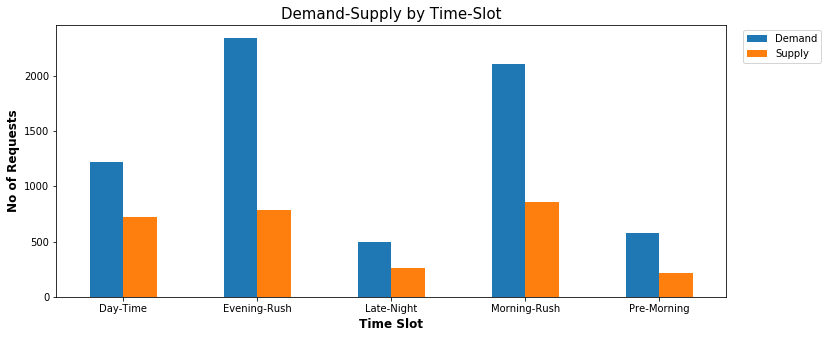

In [21]:
df_time_slot_plot = df_time_slot.plot(kind='bar',title="Demand-Supply by Time-Slot",figsize=(12,5),rot=0)
df_time_slot_plot.title.set_size(15)
df_time_slot_plot.legend(['Demand','Supply'],bbox_to_anchor=(1.15, 1))
df_time_slot_plot.set_xlabel("Time Slot",fontsize=12,fontweight='bold')
df_time_slot_plot.set_ylabel("No of Requests",fontsize=12,fontweight='bold')

### From the above plot, it can be seen that the highest gap between demand and supply exists in the time slots Morning-Rush (5AM - 10AM) and Evening-Rush (5PM - 10PM)

### Demand-Supply analysis by Pickup Point

In [22]:
df_pickup_point_group = df[(df.time_slot == "Evening-Rush") | (df.time_slot == "Morning-Rush")].groupby(['pickup_point','time_slot'])
df_pickup_point = pd.DataFrame(df_pickup_point_group['demand','supply'].sum())
df_pickup_point

demand  supply
pickup_point time_slot                   
Airport      Evening-Rush    1800     373
             Morning-Rush     426     382
City         Evening-Rush     542     411
             Morning-Rush    1677     472

Text(0,0.5,'No of Requests')

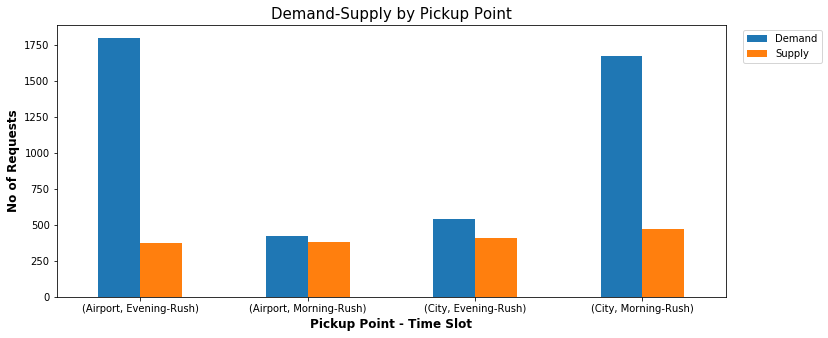

In [23]:
df_pickup_point_plot = df_pickup_point.plot(kind='bar',title="Demand-Supply by Pickup Point",figsize=(12,5),rot=0)
df_pickup_point_plot.title.set_size(15)
df_pickup_point_plot.legend(['Demand','Supply'],bbox_to_anchor=(1.15, 1))
df_pickup_point_plot.set_xlabel("Pickup Point - Time Slot",fontsize=12,fontweight='bold')
df_pickup_point_plot.set_ylabel("No of Requests",fontsize=12,fontweight='bold')

### From the above plot it can be seen that the Demand-Supply gap is severe for Airport to City requests during Evening-rush and for City to Airport during Morning-Rush

## Reason for this issue for the supply-demand gap

### Morning Hours: More cancellations could be happening due to drivers getting trips where the pick up point is far from their homes. More City to Airport rides are cancelled since the drivers might be getting less return trip requests as the demand for Airport to City is very less during the same time slot.

### Evening Hours: Cars availability could be less due to after office rush and the drivers getting off their day shifts. Less cars are available for Airport to City requests since less cars make the city to airport trip during Day-Time slot.